In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy.linalg import svd
import scipy.linalg as la

In [2]:
d=5
k=3
N=1000
av_const=50 # constant of averaging 
def get_rho(d,k): # generator of density matrices
    psi = np.reshape(np.array([np.random.normal() for i in range(d*k)]) + 1j*np.array([np.random.normal() for i in range(d*k)]), (d*k,1))
    psi=psi/(np.sqrt(psi.conjugate().T@psi))
    psi= np.reshape(psi, (d, k))
    return psi@psi.T.conjugate()
def purity(rho):# purity of density matrix
    return np.real(np.trace(rho@rho))
def get_psi(n_qubits):
    psi = np.reshape(np.array([np.random.normal() for i in range(2**n_qubits)]) + 1j*np.array([np.random.normal() for i in range(2**n_qubits)]), (2**n_qubits,1))
    psi=psi/(np.sqrt(psi.conjugate().T@psi))
    return psi
def Negativity(rho):
    rho_part_T=np.reshape(np.transpose(np.reshape(rho, [a,b,a,b]) , axes=(2,1,0,3)),(a*b,a*b))
    return np.real(np.round((np.trace(la.sqrtm(np.conjugate(rho_part_T).T@rho_part_T))-1)/2, 3))

# 1.1.1 Eigenvalues distribution

Text(0.5, 0, 'Eigenvalues')

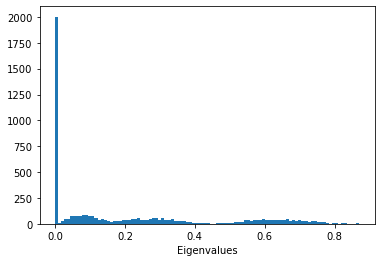

In [3]:
sample=np.array([get_rho(d,k) for i in range(N)])
eigvals=np.array([])# eigenvalues of selected matrcies
for i in range(N):
    eigvals=np.append(eigvals,np.real(np.linalg.eigvals(sample[i])))
plt.hist(eigvals,bins=100)
plt.xlabel('Eigenvalues')


Text(0.5, 0, 'Eigenvalues')

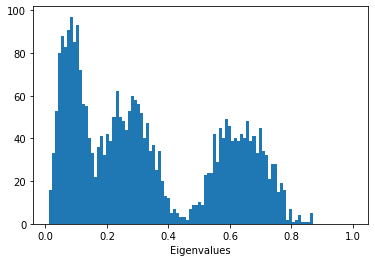

In [4]:
plt.hist(eigvals,bins=100,range=(0.01,1)) #without peak at 0
plt.xlabel('Eigenvalues')

# 1.1.2 Dependence of purity on k

Text(0, 0.5, 'Average Purity')

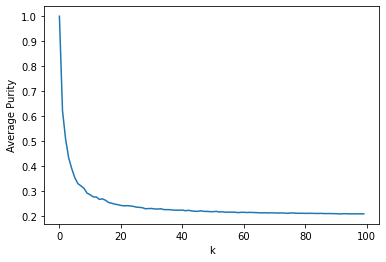

In [5]:
Purity=np.array([])
for i in range(1,101): #computing average purity
    a=np.array([get_rho(d,i) for j in range(av_const)])
    av_purity=0
    for j in range(av_const):
        av_purity+=purity(a[j])/av_const  
    Purity=np.append(Purity,np.array([np.real(av_purity)]))
plt.plot(Purity)
plt.xlabel('k')
plt.ylabel('Average Purity')

# 1.2. Schmidt decomposition

$|\psi\rangle=\frac{\sqrt{11}}{8}|0001\rangle-\frac{3}{8}|0011\rangle+\frac{\sqrt{10}}{8}|0111\rangle+\frac{\sqrt{34}}{8}|1111\rangle           $

In [6]:
a=4#subsystem dimension
b=4
psi=np.array([[0.] for i in range(a*b)])# state initialization 
psi[int('0001',2)][0]=np.sqrt(11)/8
psi[int('0011',2)][0]=-3/8
psi[int('0111',2)][0]=np.sqrt(10)/8
psi[int('1111',2)][0]=np.sqrt(34)/8
rho=psi@psi.T.conjugate()
rhoA=np.trace(np.reshape(rho, [a,b,a,b]),axis1=1,axis2=3)#partial traces
rhoB=np.trace(np.reshape(rho,[a,b,a,b]),axis1=0,axis2=2)

In [7]:
Psi = np.reshape(psi, (a, b))
u, s, vh = svd(Psi, full_matrices=False)# SVD is equivalent to Schmidt decomposition
rho_A = u*s**2@np.conjugate(u).T
rho_B = np.conjugate(vh).T@np.diag(s**2)@vh

In [8]:
#Schmidt decomposition of Psi
Schmidt=np.zeros((16,1))
for i in range(4):
    Schmidt+=s[i]*np.kron(np.reshape(u.T[i],(4,1)),np.reshape(vh[i],(4,1)))
print(Psi)
print(np.reshape(Schmidt,(4,4)))

[[ 0.          0.4145781   0.         -0.375     ]
 [ 0.          0.          0.          0.39528471]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.72886899]]
[[ 0.00000000e+00  4.14578099e-01  0.00000000e+00 -3.75000000e-01]
 [ 0.00000000e+00  2.08166817e-16  0.00000000e+00  3.95284708e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.49800181e-16  0.00000000e+00  7.28868987e-01]]


In [9]:
#entanglement metrics 
K = 1/(s**4).sum()
print('Negativity =',Negativity(rho))
print("Schmidt's number =",K)

Negativity = 0.344
Schmidt's number = 1.3094629156010233


In [10]:
samples=np.array([get_psi(4) for i in range(N)])
K_s=np.array([1/(svd(np.reshape(samples[i],(4,4)),full_matrices=False)[1]**4).sum() for i in range(N)]) # Schmidt's numbers of samples
Neg_s=np.array([Negativity(samples[i]@samples[i].conjugate().T) for i in range(N)]) #Negativity of samples

Text(0.5, 0, 'Schmidts numbers')

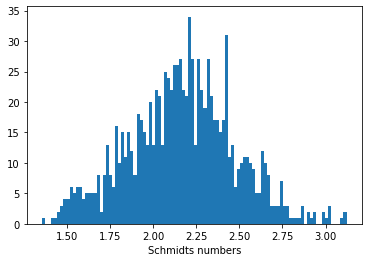

In [11]:
plt.hist(K_s, bins=100)
plt.xlabel('Schmidts numbers')

Text(0.5, 0, 'Negativity')

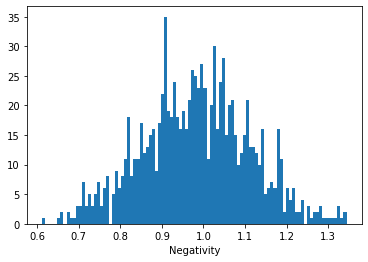

In [12]:
plt.hist(Neg_s, bins=100)
plt.xlabel('Negativity')